In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno


In [12]:
train_df = pd.read_csv('./datasets/train.csv')
'''Removing the 'id' column is a common preprocessing step in machine learning workflows.
id's do not carry predictive information and could interfere with model training if left in the dataset.
 By dropping this column from both training and test sets, you ensure that only relevant features are used for modeling'''
train_df.drop('id',inplace=True,axis=1)
print('Columns:', list(train_df.columns))
print('Info:')
train_df.info()
train_df.head()

Columns: ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [13]:
# check pseudonull values and uniqueness faults
print("\nUnique values in each column (nan is not a value):")
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
    if col != "id":
        try:
            unique_vals = train_df[col].unique()
            # Convert to string to handle mixed types, then sort
            unique_vals_str = [str(val) for val in unique_vals]
            print(f"  Values: {sorted(unique_vals_str)}")
        except Exception as e:
            print(f"  Values: {list(train_df[col].unique())}")
    print()


Unique values in each column (nan is not a value):
brand: 57 unique values
  Values: ['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac', 'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart']

model: 1897 unique values
  Values: ['124 Spider Abarth', '128 i', '135 i', '135 is', '1500 Big Horn', '1500 Cheyenne', '1500 Cheyenne Extended Cab', '1500 Classic SLT', '1500 Classic Tradesman', '1500 Classic Warlock', '1500 Laramie', '1500 Limited', '1500 Longhorn', '1500 Rebel', '1500 SLT', '1500 Sport', '1500 TRX', '1500 Trades

"brand" column has no pseudonull values and unique values are OK
"model" column has no pseudonull values and unique values are OK
"model_year" column has no pseudonull values and unique values are OK
"mileage" column has no pseudonull values and unique values are OK
"fuel_type" column has pseudonull values "-"
"engine" column has pseudonull values "-"
"transmission" column has pseudonull values "-"
"ext_col" column has pseudonull values "-"
"int_col" column has pseudonull values "-"
"accident" column has no pseudonull values and unique values are OK
"clean_title" column has no pseudonull values and unique values are OK
"price" column has no pseudonull values and unique values are OK

In [14]:
# replace "-" values by nan
df_clean = train_df.copy()
missing_values = ['-', '—', '–', '−']
df_clean = df_clean.replace(missing_values, np.nan)
print('Info after replacing "-" by nan:')
df_clean.info()

Info after replacing "-" by nan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     182669 non-null  object
 5   engine        187608 non-null  object
 6   transmission  188446 non-null  object
 7   ext_col       188167 non-null  object
 8   int_col       184006 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


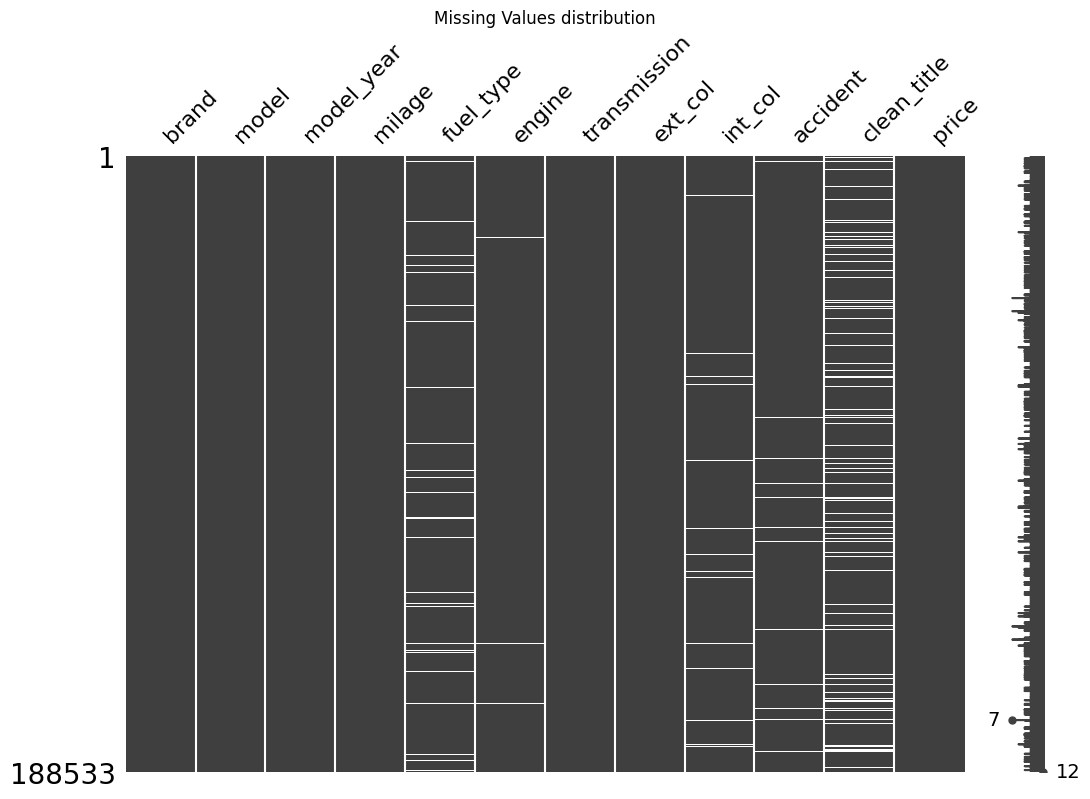

In [15]:
msno.matrix(df_clean, figsize=(12, 8))
plt.title('Missing Values distribution')
plt.show()

In [16]:
#check for duplicate rows
duplicates = df_clean[df_clean.duplicated(keep=False)]#df_clean.duplicated(keep=False) returns a boolean Series indicating if a row is duplicated in the  DataFrame
duplicates.shape

(0, 12)

There are no duplicate rows in our dataset

In [23]:
# delete any row with nan value
df_clean.dropna(inplace=True)
print('Info after deleting nan rows')
df_clean.info()
df_clean.to_csv('./datasets/train_cleaned.csv')

Info after deleting nan rows
<class 'pandas.core.frame.DataFrame'>
Index: 145494 entries, 0 to 188532
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   brand                  145494 non-null  object 
 1   model                  145494 non-null  object 
 2   model_year             145494 non-null  int64  
 3   milage                 145494 non-null  int64  
 4   fuel_type              145494 non-null  object 
 5   engine                 145494 non-null  object 
 6   transmission           145494 non-null  object 
 7   ext_col                145494 non-null  object 
 8   int_col                145494 non-null  object 
 9   accident               145494 non-null  object 
 10  clean_title            145494 non-null  object 
 11  price                  145494 non-null  int64  
 12  age                    145494 non-null  int64  
 13  milage_per_year        145494 non-null  float64
 14  horsepower  

In [24]:
from datetime import datetime

def feature_engineering(df_clean):
    current_year = datetime.now().year

    df_clean['age'] = current_year - df_clean['model_year']
    df_clean['milage_per_year'] = df_clean['milage']/df_clean['age']

    def extract_horsepower(engine):
        try:
            return float(engine.split('HP')[0])
        except:
            return None

    def extract_engine_size(engine):
        try:
            return float(engine.split(' ')[1].replace('L', ''))
        except:
            return None

    df_clean['horsepower'] = df_clean['engine'].apply(extract_horsepower)
    df_clean['engine_size'] = df_clean['engine'].apply(extract_engine_size)
    df_clean['power_to_weight_ratio'] = df_clean['horsepower']/df_clean['engine_size']

    luxury_brands =  ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 
                    'Lexus', 'Jaguar', 'Bentley', 'Maserati', 'Lamborghini', 
                    'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston', 'Maybach']
    df_clean['Is_Luxury_Brand'] = df_clean['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

    df_clean['Accident_Impact'] = df_clean.apply(lambda x: 1 if x['accident'] == 1 and x['clean_title'] == 0 else 0, axis=1)
    
    return df_clean


In [19]:
df_clean = feature_engineering(df_clean)

## Metrics
Now that we have cleaned our dataset, let´s get its metrics

## Univariate Analysis

Now we'll perform a comprehensive univariate analysis to understand the distribution and characteristics of each variable in our cleaned dataset.



UNIVARIATE ANALYSIS - VISUALIZATIONS


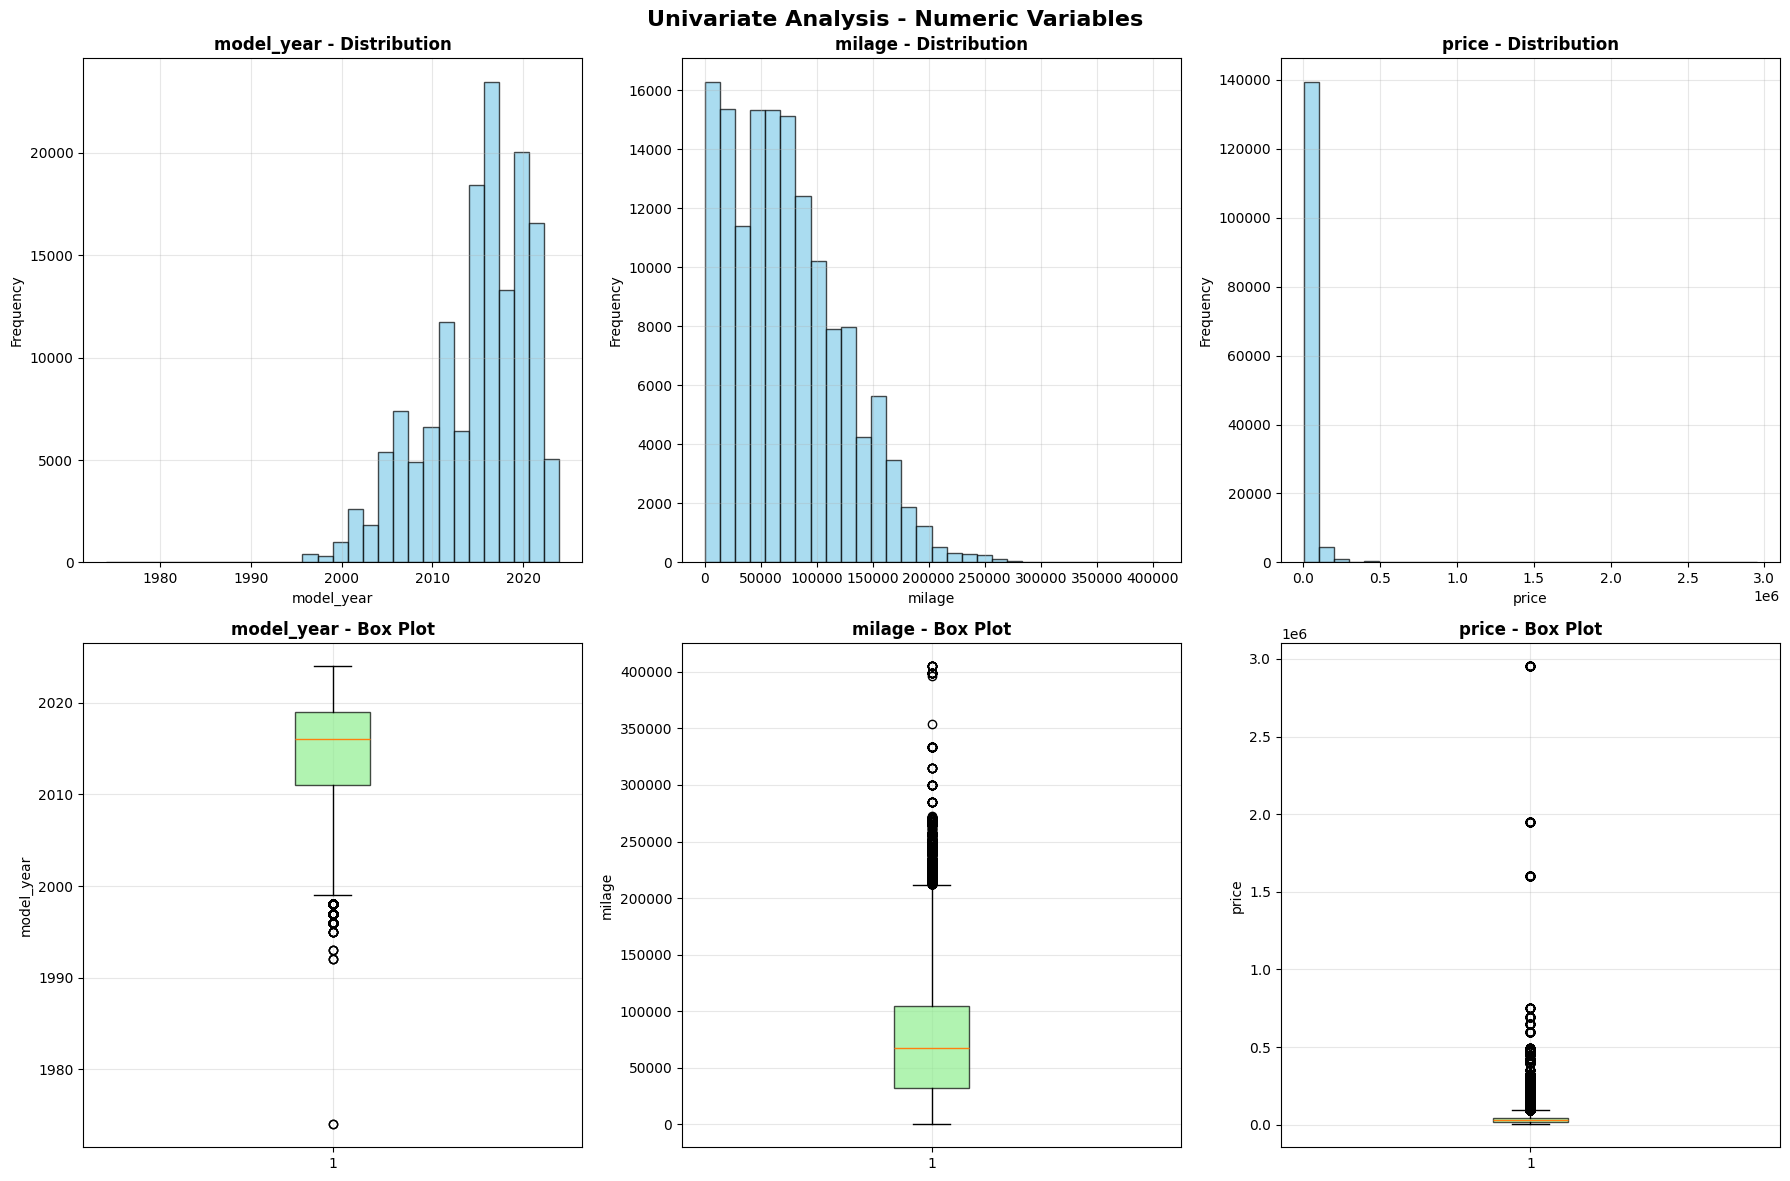

In [25]:
# UNIVARIATE VISUALIZATIONS
print("\n" + "=" * 60)
print("UNIVARIATE ANALYSIS - VISUALIZATIONS")
print("=" * 60)

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

# 1. NUMERIC VARIABLES PLOTS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis - Numeric Variables', fontsize=16, fontweight='bold')

numeric_columns = ['model_year', 'milage', 'price']

for i, col in enumerate(numeric_columns):
    # Histogram
    axes[0, i].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col} - Distribution', fontweight='bold')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # Box plot
    axes[1, i].boxplot(df_clean[col].dropna(), patch_artist=True, 
                       boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[1, i].set_title(f'{col} - Box Plot', fontweight='bold')
    axes[1, i].set_ylabel(col)
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


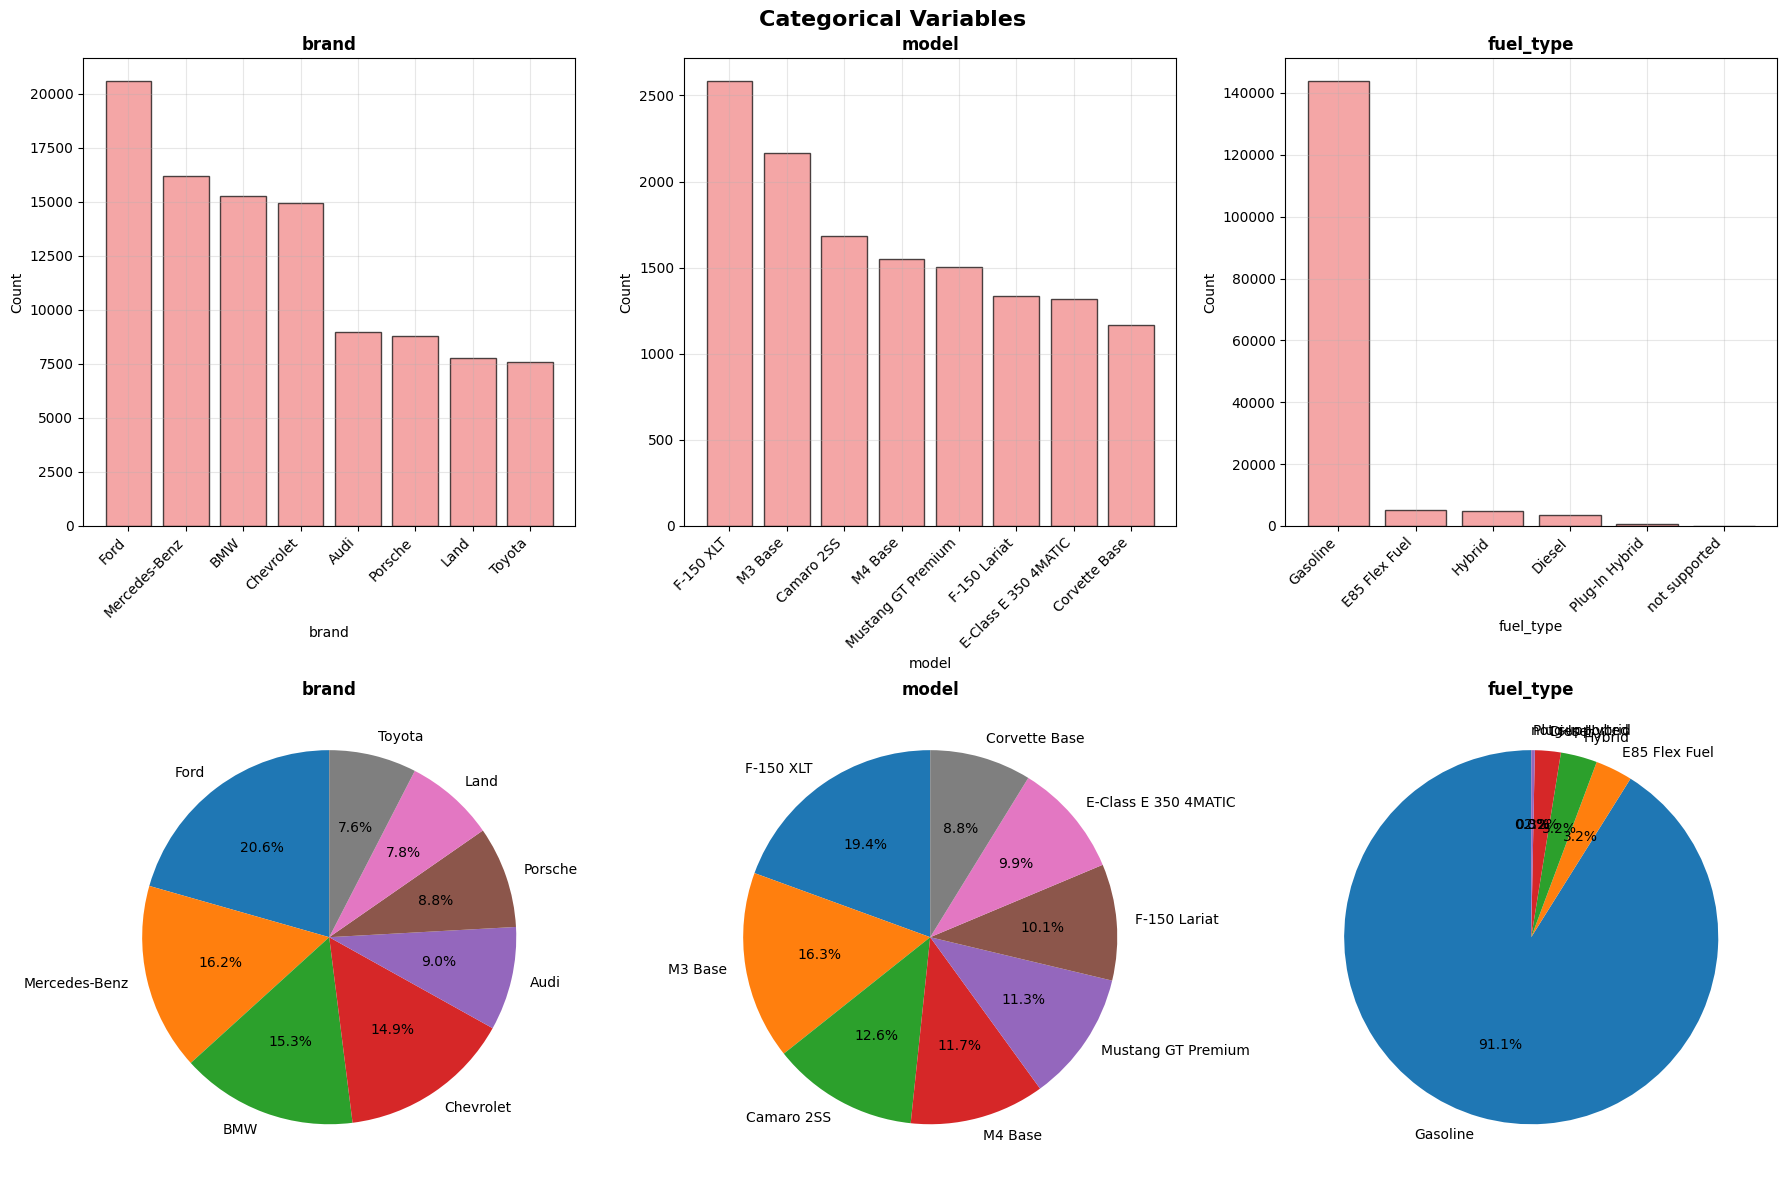

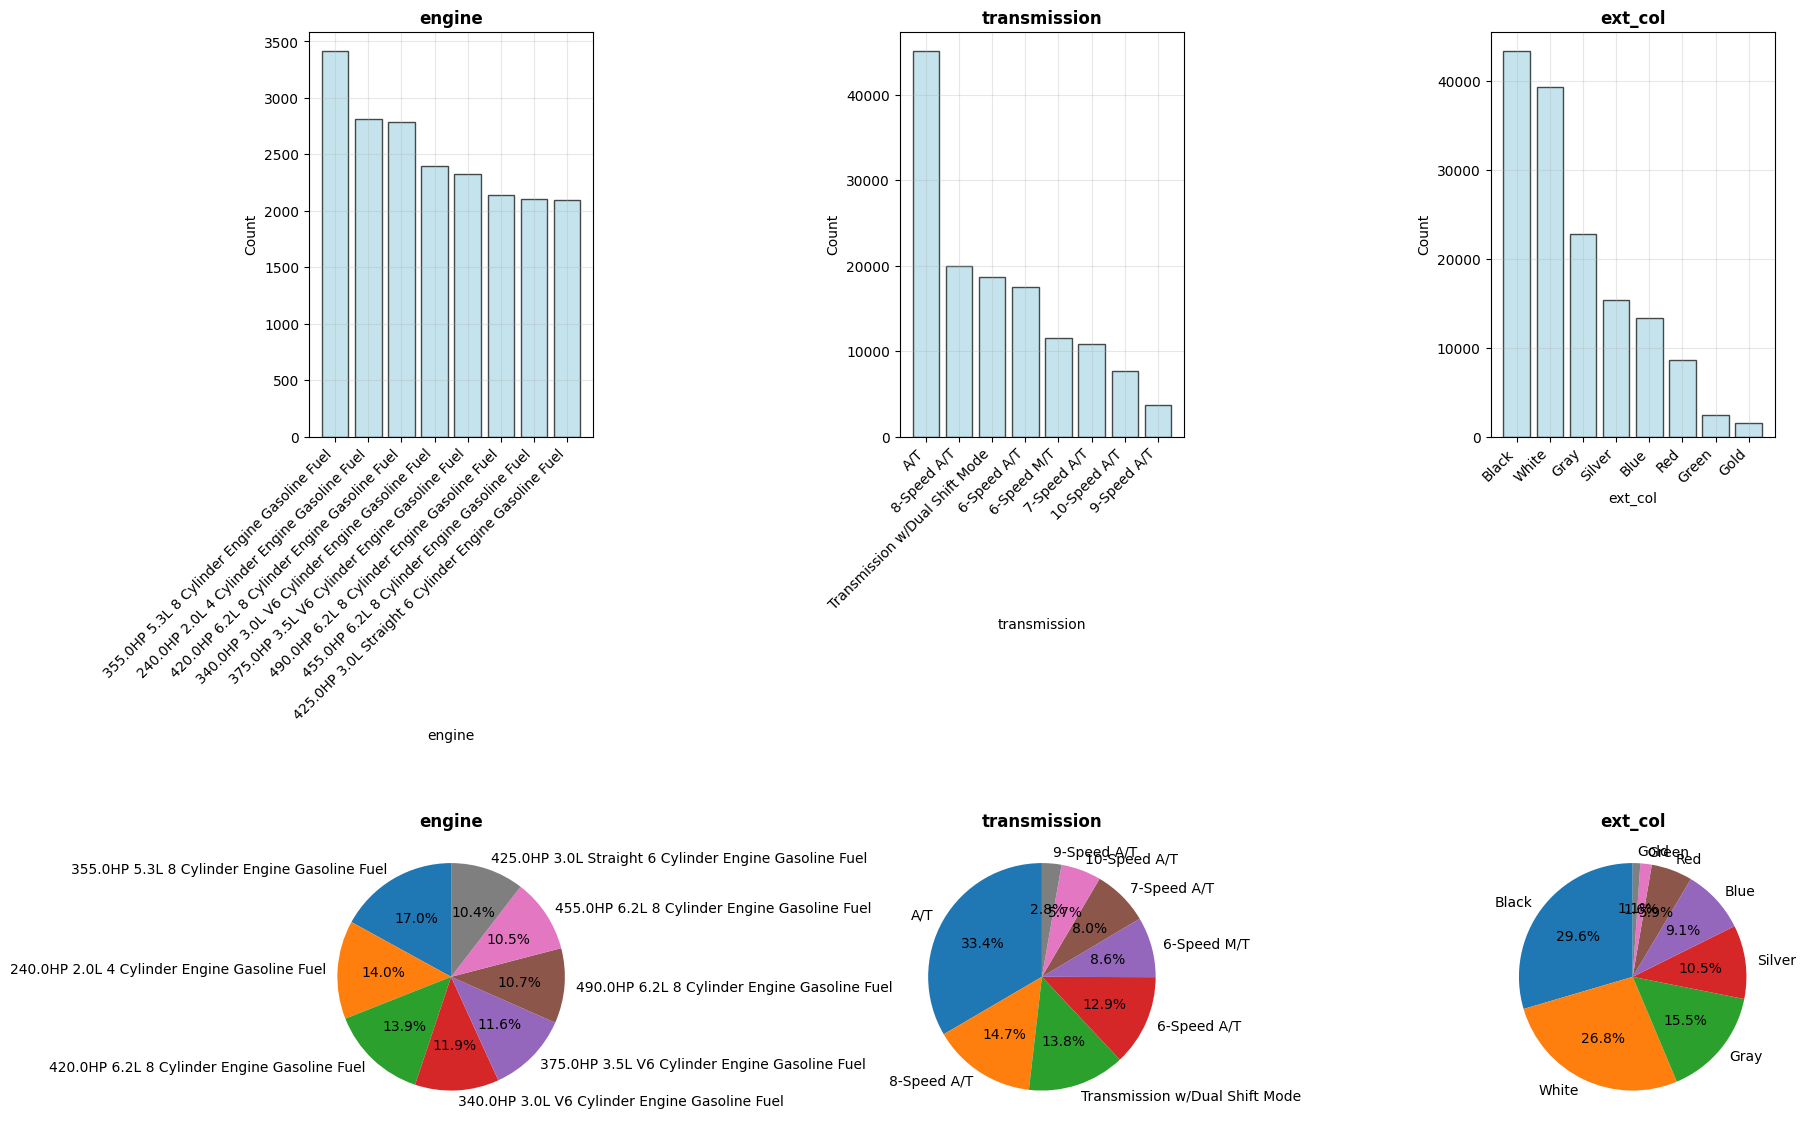

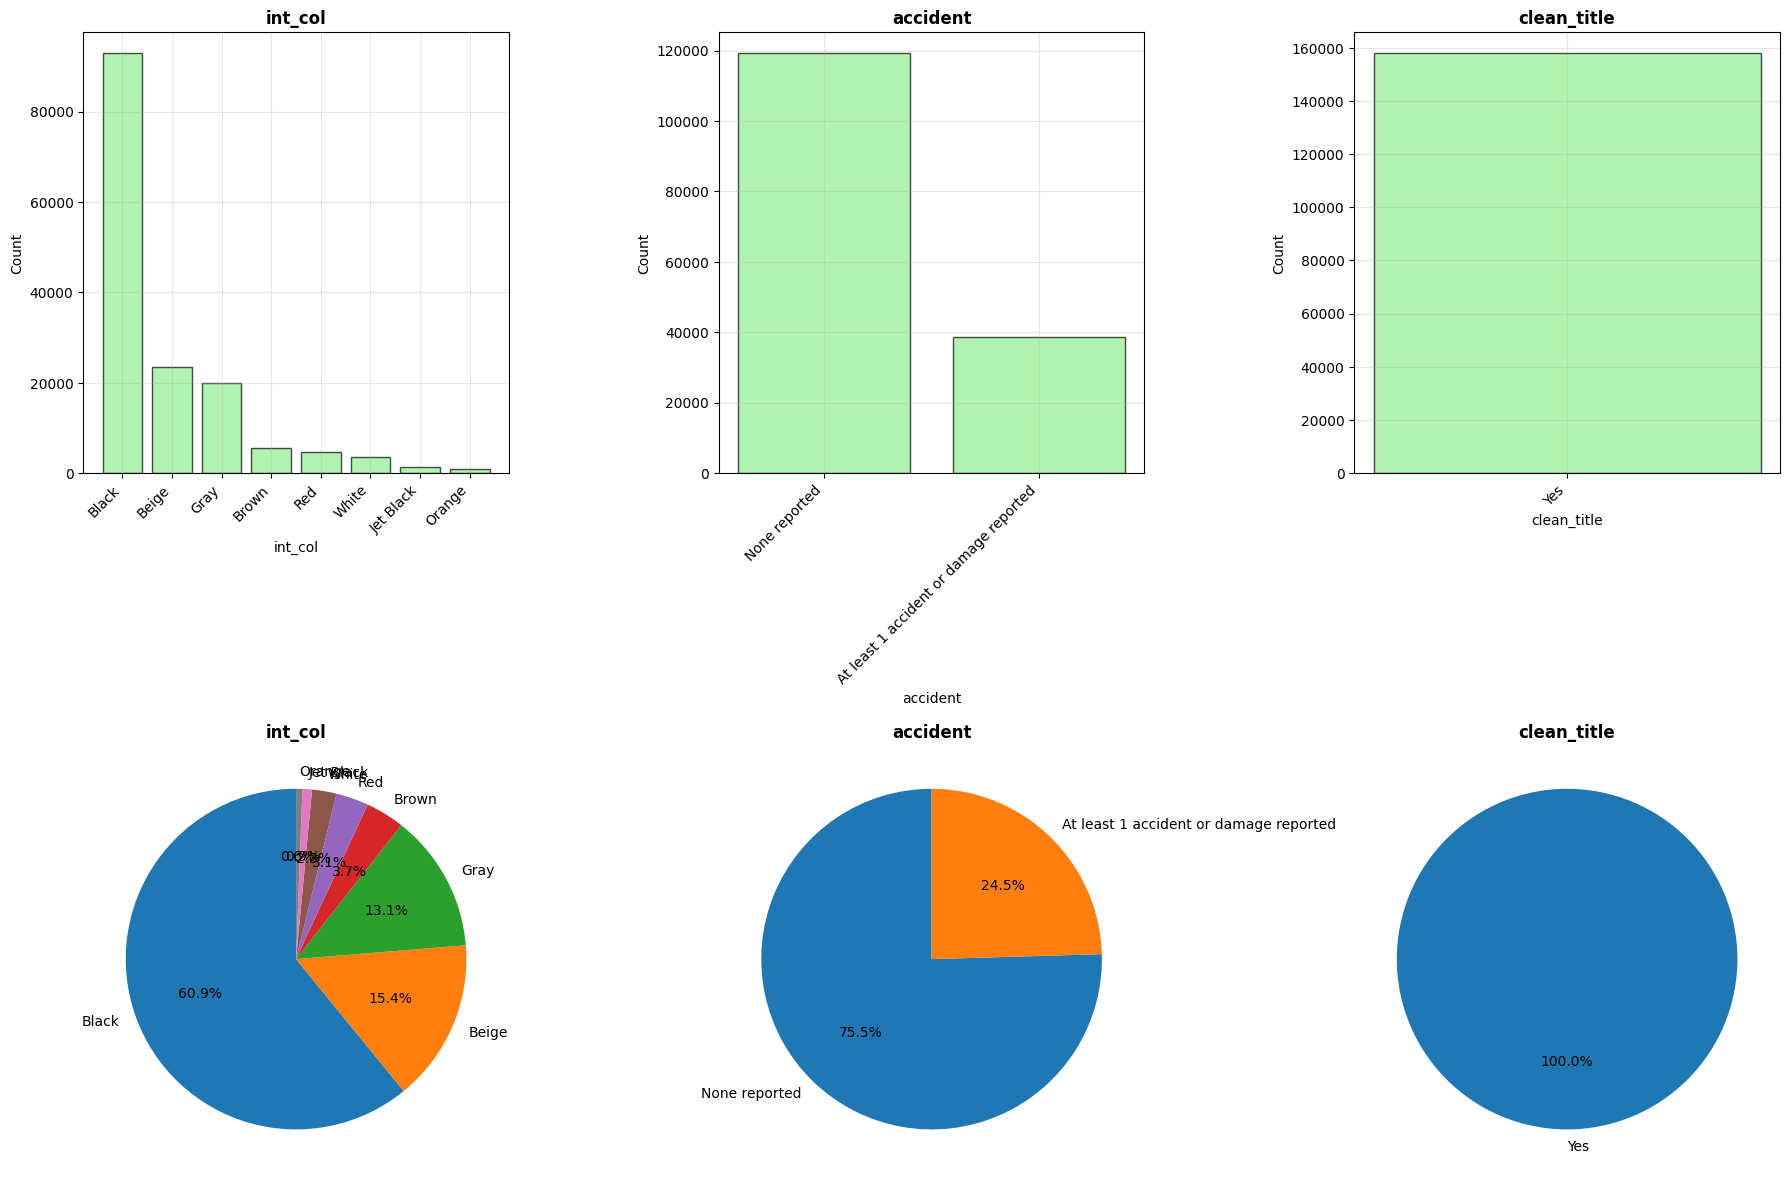

In [21]:
# CATEGORICAL VARIABLES PLOTS
categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Split into 3 groups of 3 columns each (6 charts per group)
group1 = categorical_columns[:3]  # First 3 columns: brand, model, fuel_type
group2 = categorical_columns[3:6]  # Next 3 columns: engine, transmission, ext_col
group3 = categorical_columns[6:]  # Last 3 columns: int_col, accident, clean_title

# FIGURE 1: First 3 columns (6 charts)
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 12))
fig1.suptitle('Categorical Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(group1):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes1[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightcoral', alpha=0.7, edgecolor='black')
    axes1[0, i].set_title(f'{col}', fontweight='bold')
    axes1[0, i].set_xlabel(col)
    axes1[0, i].set_ylabel('Count')
    axes1[0, i].tick_params(axis='x', rotation=45)
    axes1[0, i].grid(True, alpha=0.3)
    axes1[0, i].set_xticks(range(len(value_counts)))
    axes1[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes1[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes1[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()

# FIGURE 2: Next 3 columns (6 charts)
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 12))
#fig2.suptitle('Categorical Variables - Group 2 (Bar + Pie Charts)', fontsize=16, fontweight='bold')

for i, col in enumerate(group2):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes2[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightblue', alpha=0.7, edgecolor='black')
    axes2[0, i].set_title(f'{col}', fontweight='bold')
    axes2[0, i].set_xlabel(col)
    axes2[0, i].set_ylabel('Count')
    axes2[0, i].tick_params(axis='x', rotation=45)
    axes2[0, i].grid(True, alpha=0.3)
    axes2[0, i].set_xticks(range(len(value_counts)))
    axes2[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes2[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes2[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()

# FIGURE 3: Last 3 columns (6 charts)
fig3, axes3 = plt.subplots(2, 3, figsize=(18, 12))
#fig3.suptitle('Categorical Variables - Group 3 (Bar + Pie Charts)', fontsize=16, fontweight='bold')

for i, col in enumerate(group3):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes3[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightgreen', alpha=0.7, edgecolor='black')
    axes3[0, i].set_title(f'{col}', fontweight='bold')
    axes3[0, i].set_xlabel(col)
    axes3[0, i].set_ylabel('Count')
    axes3[0, i].tick_params(axis='x', rotation=45)
    axes3[0, i].grid(True, alpha=0.3)
    axes3[0, i].set_xticks(range(len(value_counts)))
    axes3[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes3[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes3[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()


## Tree regression model training


In [29]:
#First we need to encode categorical columns so the model can be trained
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df_clean.drop(columns=['price'])
y = df_clean['price']

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns
print("Categorical columns:", list(cat_cols))
print("Numerical columns:", list(num_cols))

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Reduce overfitting by limiting tree depth and minimum samples per leaf
model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', DecisionTreeRegressor(random_state=1, max_depth=5, min_samples_leaf=10))
])

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model.fit(train_X, train_y)
# Predict with all validation observations
val_predictions = model.predict(val_X)
# print the top few validation predictions
print("Predictions with validation set:\n")
print(val_predictions[0:5])
# print the top few actual prices from validation data
print("actual prices from validation set:\n")
print(val_y[0:5])

val_mae = mean_absolute_error(val_y, val_predictions)
print("mean absolute error in validation predictions:\n")
print(val_mae)

print("Predictions with training set:\n")
# Predict with training observations
train_predictions = model.predict(train_X)
# print the top few training predictions
print("Predictions with training set:\n")
print(train_predictions[0:5])
# print the top few actual prices from training data
print("actual prices in training set:\n")
print(train_y[0:5])

train_mae = mean_absolute_error(train_y, train_predictions)
print("mean absolute error in training predictions:\n")
print(train_mae)

Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Numerical columns: ['model_year', 'milage', 'age', 'milage_per_year', 'horsepower', 'engine_size', 'power_to_weight_ratio', 'Is_Luxury_Brand', 'Accident_Impact']
Predictions with validation set:

[42450.00845511 65770.68384376 13675.97244247 84598.55615844
 37198.43656497]
actual prices from validation set:

138207    36000
105711    49900
105765    10999
122174    24500
23233     30500
Name: price, dtype: int64
mean absolute error in validation predictions:

17716.729307501657
Predictions with training set:

Predictions with validation set:

[42450.00845511 65770.68384376 13675.97244247 84598.55615844
 37198.43656497]
actual prices from validation set:

138207    36000
105711    49900
105765    10999
122174    24500
23233     30500
Name: price, dtype: int64
mean absolute error in validation predictions:

17716.729307501657
Predictions with training set:

Pred

In [ ]:
""" NATIVE XGBOOST ENCODING Converts object columns to pandas categorical dtype and let XGBoost handle them.
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['price']).copy()
y = df_clean['price']

#selects all object (string) columns and convert them to pandas categorical dtype (required by XGBoost)
for c in X.select_dtypes(include='object').columns:
    X[c] = X[c].astype('category')

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

model = XGBRegressor(
    tree_method='hist',#  Uses histogram-based tree growth, required for native categorical columns
    enable_categorical=True, #Tells XGBoost to handle pandas Categorical dtypes directly
    n_estimators=500, learning_rate=0.05, #n_estimators: Number of boosting trees (iterations). More trees = higher capacity, more time. learning_rate=0.05: Shrinks each tree’s contribution; lower needs more trees, can generalize better
    max_depth=8, subsample=0.8, colsample_bytree=0.8, #max_depth: Maximum depth per tree; higher depth captures more interactions, risks overfitting.
    random_state=1
)
model.fit(X_train, y_train) """

" NATIVE XGBOOST ENCODING Converts object columns to pandas categorical dtype and let XGBoost handle them.\nfrom xgboost import XGBRegressor\nfrom sklearn.model_selection import train_test_split\n\nX = df_clean.drop(columns=['price']).copy()\ny = df_clean['price']\n\n#selects all object (string) columns and convert them to pandas categorical dtype (required by XGBoost)\nfor c in X.select_dtypes(include='object').columns:\n    X[c] = X[c].astype('category')\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)\n\nmodel = XGBRegressor(\n    tree_method='hist',#  Uses histogram-based tree growth, required for native categorical columns\n    enable_categorical=True, #Tells XGBoost to handle pandas Categorical dtypes directly\n    n_estimators=500, learning_rate=0.05, #n_estimators: Number of boosting trees (iterations). More trees = higher capacity, more time. learning_rate=0.05: Shrinks each tree’s contribution; lower needs more trees, can generalize better\n    max_d

In [ ]:
# XGBOOST one-hot ENCODING (works on any XGBoost version)
""" from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['price'])
y = df_clean['price']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='number').columns

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols),
    ('num', 'passthrough', num_cols)
])

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, random_state=1
    ))
])

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train) """

" from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.pipeline import Pipeline\nfrom xgboost import XGBRegressor\nfrom sklearn.model_selection import train_test_split\n\nX = df_clean.drop(columns=['price'])\ny = df_clean['price']\n\ncat_cols = X.select_dtypes(include='object').columns\nnum_cols = X.select_dtypes(include='number').columns\n\npreprocess = ColumnTransformer([\n    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols),\n    ('num', 'passthrough', num_cols)\n])\n\nmodel = Pipeline(steps=[\n    ('prep', preprocess),\n    ('reg', XGBRegressor(\n        n_estimators=500, learning_rate=0.05, max_depth=8,\n        subsample=0.8, colsample_bytree=0.8, random_state=1\n    ))\n])\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)\nmodel.fit(X_train, y_train) "